In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# model utils
from sklearn.utils import shuffle
#model selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

## **Step 0. Load data**

In [99]:
!wget -q https://raw.githubusercontent.com/MarthyGarcia/IFT6390_Project1/main/Data/weight-height.csv

In [100]:
df = pd.read_csv('weight-height.csv')

In [101]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## **Step 1. Exploratory data analysis**

In [102]:
# get data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [103]:
# title Install the facets_overview pip package.
!pip install facets-overview

In [104]:
# Create the feature stats for the datasets and stringify it.
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import pandas as pd
proto = GenericFeatureStatisticsGenerator().ProtoFromDataFrames([{'name': 'raw_data', 'table': df}])

In [105]:
from IPython.core.display import display, HTML
import base64
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

There is a total of 10,000 samples. The data is composed of 3 fields: 

1.   Gender: two values are possible male and female. They are equally distributed.
2.   Height: the height is distributed between a min value of 54.26 and a max value of 79. The average is 66.37 with a standard deviation of 3.85. 
3. Weight: the weight is distributed between a min value of 64.7 and a maximum of 269.99. The average weight is 161.44 with a standard deviation of 32.11.

The goal is to predict the weight of a person given the gender and the height.


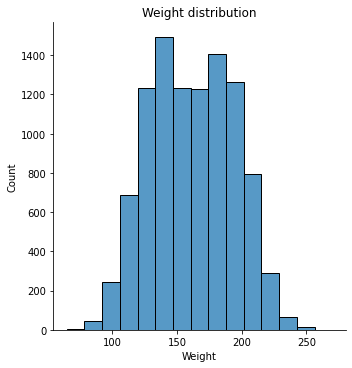

In [106]:
# plot the distribution of the label (Weight)
sns.displot(df['Weight'].dropna(), bins=15, kde=False)
plt.ylabel('Count')
plt.title('Weight distribution');

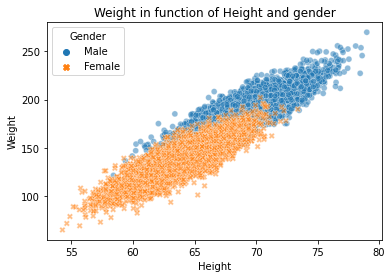

In [107]:
#plot weight against height and gender
sns.scatterplot(x=df["Height"], y=df["Weight"], hue=df['Gender'], style=df['Gender'], alpha=0.5)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Weight in function of Height and gender")
plt.show();

In [108]:
male_df=df[df["Gender"]=='Male']
female_df=df[df["Gender"]=='Female']

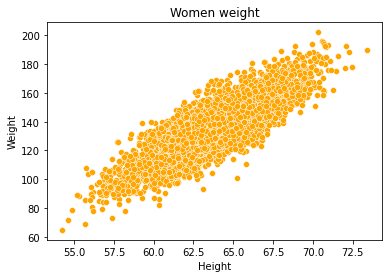

In [109]:
#plot weight against height and gender
sns.scatterplot(x=female_df["Height"], y=female_df["Weight"], color='orange')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Women weight")
plt.show();

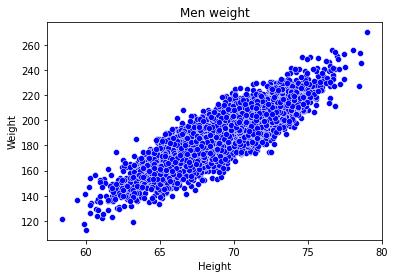

In [110]:
#plot weight against height and gender
sns.scatterplot(x=male_df["Height"], y=male_df["Weight"], color='blue')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Men weight")
plt.show();

From the data, it seems like the men are taller and heavier than women. 

In [111]:
# it seems like there are no null values. Let's verify it
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

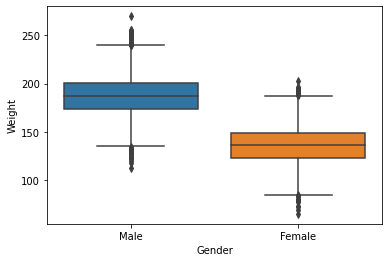

In [112]:
sns.boxplot(x=df["Gender"], y=df["Weight"]);

In [113]:
# make correlation matrix
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


## **Step 4. Feature engineering**

In [114]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [115]:
#one-hot encode categorical features (gender)

df.loc[df['Gender'] == 'Male', 'Gender'] = 1
df.loc[df['Gender'] == 'Female', 'Gender'] = 0

In [116]:
df.sample(10)

,Gender,Height,Weight
4773,1,64.318061,157.783021
7549,0,58.913826,116.421136
9278,0,61.407533,114.885446
8578,0,61.304754,104.855762
1165,1,67.749207,178.583627
7229,0,67.443661,160.288167
5757,0,60.786884,133.235538
7211,0,68.297719,150.146735
96,1,71.701234,193.094164
227,1,67.821093,169.081008


## **Step 5. Fit model**

In [117]:
# set seed
seed=1000

In [118]:
df = shuffle(df, random_state=seed)

In [119]:
#features
x=df.iloc[:, :-1]
#labels
y=df.iloc[:, -1]

In [120]:
# split data: test, train and validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle= True, random_state=seed)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size= 0.2, shuffle= True, random_state=seed)

**Linear regression- Baseline**

In [121]:
modelLR = LinearRegression()
modelLR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
modelLR.score(x_train,y_train)


0.9034508655293365

In [123]:
modelLR.score(x_valid,y_valid)

0.9013124472477695

**Gradient Boosting**

In [128]:
modelGBoost = GradientBoostingRegressor(random_state=seed)
modelGBoost.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1000, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
modelGBoost.score(x_train,y_train)

0.908153465201418

In [129]:
modelGBoost.score(x_valid,y_valid)

0.9010151283253824

**Random forest**

In [141]:
max_depth=[int(x) for x in np.linspace(5, 15, num = 11)]

In [142]:
random_grid = {
               'max_depth': max_depth
              }

In [131]:
modelRf = RandomForestRegressor(random_state=seed)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1000, verbose=0, warm_start=False)

In [146]:
modelRf_cv = RandomizedSearchCV(estimator = modelRf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=seed, n_jobs = -1)

In [147]:
modelRf_cv.fit(x_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 11 is smaller than n_iter=100. Running 11 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   22.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [148]:
modelRf_cv.best_params_

{'max_depth': 5}

In [149]:
modelRf_cv.score(x_train,y_train)

0.9059815078317369

In [150]:
modelRf_cv.score(x_valid,y_valid)

0.9007714681617698

**Voting Regressor**

In [152]:
modelVr = VotingRegressor(
    estimators=[
        ('Lr', modelLR), # KNN
        ('Rf', modelRf_cv), # SVM
        ('Gboost', modelGBoost), # Linear regressor
          ])
modelVr.fit(x_train, y_train)


Fitting 5 folds for each of 11 candidates, totalling 55 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 11 is smaller than n_iter=100. Running 11 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   22.5s finished


VotingRegressor(estimators=[('Lr',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('Rf',
                             RandomizedSearchCV(cv=5, error_score=nan,
                                                estimator=RandomForestRegressor(bootstrap=True,
                                                                                ccp_alpha=0.0,
                                                                                criterion='mse',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                max_samples=None,
                  

In [154]:
modelVr.score(x_train,y_train)

0.9062078172128538

In [153]:
modelVr.score(x_valid,y_valid)

0.9013687114184482

Observations: the Voting regression is the best performing methods. However, the score obtained with linear regression in only 0.006% below. Therefore, linear regression is selected due to the interpretability of the model.

## **Step 6. Score model**

In [157]:
modelLR.score(x_test,y_test)

0.9012943183367622

## **Discussion**

Bias:
Gender identified as?